本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
            open  high  close   low     volume  price_change  p_change    ma5  \
date                                                                            
2020-05-06  8.50  9.03   8.78  8.48  144513.02          0.19      2.21  8.510   
2020-05-07  8.74  8.79   8.62  8.61   91354.79         -0.16     -1.82  8.568   
2020-05-08  8.66  8.78   8.72  8.63   66462.71          0.10      1.16  8.630   
2020-05-11  8.72  8.88   8.74  8.68   92209.82          0.02      0.23  8.690   
2020-05-12  8.70  8.81   8.66  8.60   69220.81         -0.08     -0.92  8.704   

             ma10   ma20      v_ma5     v_ma10    v_ma20  turnover  
date                                                                
2020-05-06  8.489  8.483   99234.08  101892.24  88398.97      2.20  
2020-05-07  8.510  8.491  103293.44  105599.52  89909.80      1.39  
2020-05-08  8.552  8.493   97312.90  106229.48  88478.59      1.01  
2020-05-11  8.592  8.500  101367.05

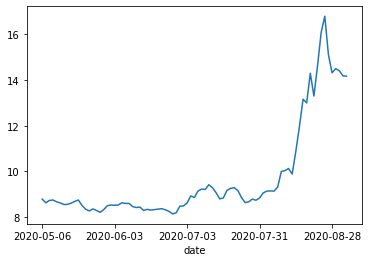

In [17]:
import tushare as ts
import numpy as np
import matplotlib.pyplot as plt

df = ts.get_hist_data("600158",'2020-05-03','2020-09-03')
df = df.sort_index()
print(df.head(5))
df.close.plot()

[8.78, 8.62, 8.72, 8.74, 8.66, 8.61, 8.54, 8.55, 8.6, 8.68, 8.74, 8.5, 8.34, 8.26, 8.35, 8.28, 8.2, 8.32, 8.49, 8.52, 8.51, 8.52, 8.62, 8.59, 8.59, 8.45, 8.41, 8.43, 8.28, 8.33, 8.3, 8.32, 8.34, 8.36, 8.31, 8.24, 8.13, 8.18, 8.47, 8.48, 8.61, 8.92, 8.85, 9.13, 9.22, 9.2, 9.41, 9.28, 9.06, 8.79, 8.83, 9.16, 9.25, 9.28, 9.16, 8.85, 8.63, 8.66, 8.78, 8.73, 8.83, 9.05, 9.13, 9.14, 9.13, 9.31, 9.99, 10.03, 10.12, 9.88, 10.87, 11.96, 13.16, 13.0, 14.3, 13.3, 14.63, 16.09, 16.8, 15.12, 14.32, 14.5, 14.41, 14.19, 14.17]
[0.2 0.2 0.2 0.2 0.2]


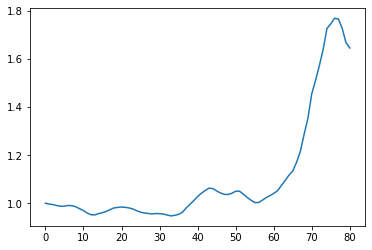

In [18]:
'''
卷积就象一把锉刀，它主要是把一些非光滑的函数或算子光滑化。
numpy.convolve(a, v, mode=‘full’)，这是numpy函数中的卷积函数库
a:(N,)输入的一维数组
b:(M,)输入的第二个一维数组
mode:{‘full’, ‘valid’, ‘same’}参数可选
  ‘full’　默认值，返回每一个卷积值，长度是N+M-1,在卷积的边缘处，信号不重叠，存在边际效应。
  ‘same’　返回的数组长度为max(M, N),边际效应依旧存在。
  ‘valid’ 　返回的数组长度为max(M,N)-min(M,N)+1,此时返回的是完全重叠的点。边缘的点无效。
---------------------------------------------------------------------------------
np.ones()返回一个全1的n维数组，同样也有三个参数：shape（用来指定返回数组的大小）、
dtype（数组元素的类型）、order（是否以内存中的C或Fortran连续（行或列）顺序存储多维数据）。
后两个参数都是可选的，一般只需设定第一个参数。
'''
def moving_average(ts, win):
    return np.convolve(ts, np.ones(win)/win, 'valid')


def rmse(y, y_hat):
    """
    返回预测序列相对于真值序列的标准差。
    Args:
        y:
        y_hat:

    Returns:

    """
    return np.sqrt(np.mean(np.square(y - y_hat)))
print(df.close.tolist())
ma = moving_average(df.close, 5)
print(np.ones(5)/5)
# 这里ma是一个numpy数组,numpy数组可以与标量进行element-wise操作，这被称之为广播
ts = ma/ma[0]

# plt.plot(ma)
plt.plot(ts)

In [12]:
import scipy.stats as stats
end = 2020-09-03'
securities = ['600158','002594','002024','002037','000002','600518','600487','601668','300353','601919','600859']
def find_parabola(unit='1d', a = 0, e=3e-3, fit_win=7):
    # array([0, 1, 2, 3, 4, 5, 6])
    x = np.arange(7)
    fields = ['date', 'close', 'open','volume']

    # 设置与显示相关的参数
    plt.figure(figsize=(15,15))
    plt.subplots_adjust(hspace=0.3)

    count = 0
    for code in securities:
        bar = ts.get_hist_data(code,'2020-05-03',end)
        bars = get_bars(code, fit_win + 5 - 1, unit=unit, include_now=True, df=False, fields=fields)
        if len(bars) != fit_win + 5 -1:
            continue

        ma = moving_average(bars['close'], 5)
        ts = ma/ma[0]
        coef = np.polyfit(x, ts, deg=2)
        p = np.poly1d(coef)
        ts_hat = np.array([p(xi) for xi in x])
        r, p = stats.pearsonr(ts, ts_hat)
        err = rmse(ts, ts_hat) / np.sqrt(np.mean(np.square(ts)))
        if err > e:
            continue

        _a,_b,_c = coef
        vert_x = -_b / (2 * _a)
        t1 = _a > a and (fit_win-2)>vert_x > 2
        # 如果是用于实际选股，你还需要加上其它条件，比如当前收阳，或者量能增加等
        #         if not t1:
        #             continue
        #         vol_up = bars['volume'][-4:-1]>bars['volume'][-5:-2]

        #         t2 = np.count_nonzero(vol_up) >= 2
        #         if not t2:
        #             continue

        #         ups = bars['close'][-3:]>bars['open'][-3:]
        #         t3 = np.count_nonzero(ups) == 3
        #         if not t3:
        #             continue

        # 作为示例，我们只输出9张图
        if count >= 9:
            break

        if t1:
            count += 1

            ax = plt.subplot(int(f"33{count}"))
            # 显示股票代码，为避免推广嫌疑，这里注释掉。读者在运行时可以自己打开。
            # ax.set_title(code)
            ax.set_title(f"a:{_a:.3f} b:{_b:.3f}, vx: {vert_x:.1f},r:{r:.3f},p:{p:.3f}")
            plt.plot(x, ts)
            plt.plot(x, ts_hat, '--')


find_parabola()

NameError: name 'get_all_securities' is not defined

In [13]:
x = np.arange(7)
x

array([0, 1, 2, 3, 4, 5, 6])